# Visualization demos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
from qutip import about, basis, identity, sigmax, sigmay, sigmaz
from scipy.special import sph_harm

%matplotlib inline

## Hinton

In [2]:
rho = qt.rand_dm(5)

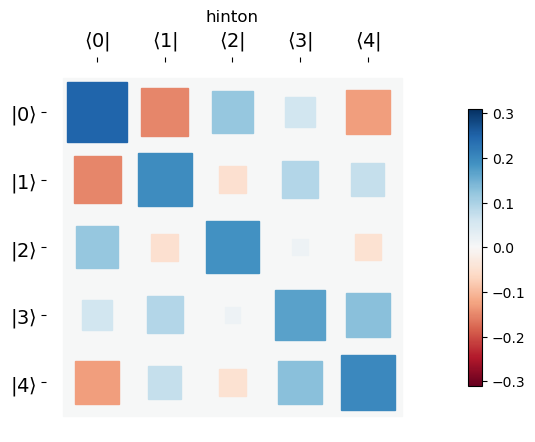

In [3]:
fig, ax = qt.hinton(rho)
ax.set_title('hinton');

## Sphereplot

In [4]:
theta = np.linspace(0, np.pi, 90)
phi = np.linspace(0, 2 * np.pi, 60)

/tmp/ipykernel_10562/1816281877.py:2: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  orbital = sph_harm(-1, 2, phi_mesh, theta_mesh).T


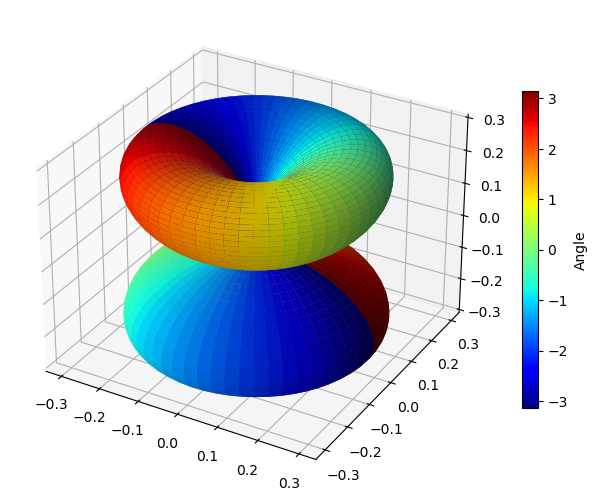

In [5]:
phi_mesh, theta_mesh = np.meshgrid(phi, theta)
orbital = sph_harm(-1, 2, phi_mesh, theta_mesh).T
qt.sphereplot(orbital, theta, phi);

/tmp/ipykernel_10562/2075646104.py:4: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  orbital = sph_harm(-1, 1, phi_mesh, theta_mesh).T
/tmp/ipykernel_10562/2075646104.py:8: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  orbital = sph_harm(0, 1, phi_mesh, theta_mesh).T


/tmp/ipykernel_10562/2075646104.py:12: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  orbital = sph_harm(1, 1, phi_mesh, theta_mesh).T


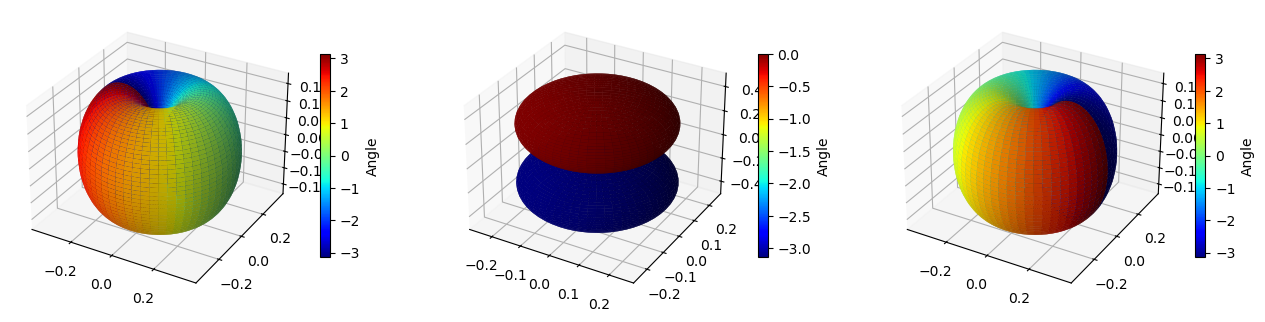

In [6]:
fig = plt.figure(figsize=(16, 4))

ax = fig.add_subplot(1, 3, 1, projection="3d")
orbital = sph_harm(-1, 1, phi_mesh, theta_mesh).T
qt.sphereplot(orbital, theta, phi, ax=ax)

ax = fig.add_subplot(1, 3, 2, projection="3d")
orbital = sph_harm(0, 1, phi_mesh, theta_mesh).T
qt.sphereplot(orbital, theta, phi, ax=ax)

ax = fig.add_subplot(1, 3, 3, projection="3d")
orbital = sph_harm(1, 1, phi_mesh, theta_mesh).T
qt.sphereplot(orbital, theta, phi, ax=ax);

# Matrix histogram

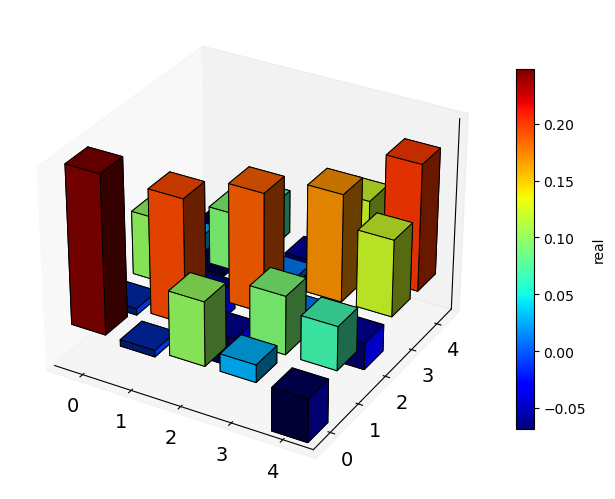

In [7]:
qt.matrix_histogram(rho.full().real);

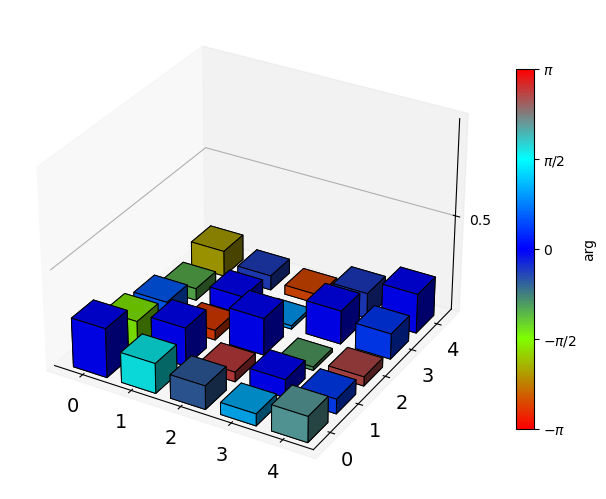

In [8]:
qt.matrix_histogram(rho.full(), limits=[0, 1],
                    bar_style='abs', color_style='phase');

# Plot energy levels

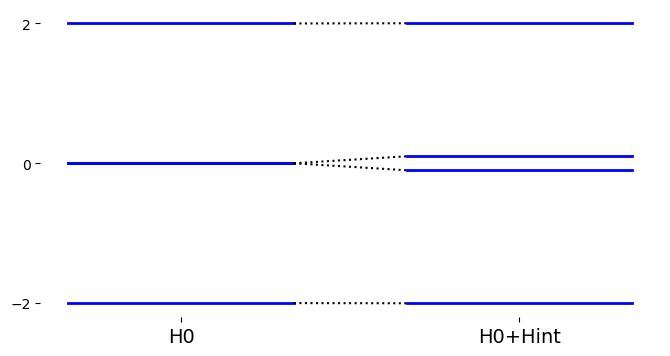

In [9]:
H0 = qt.tensor(sigmaz(), identity(2)) + qt.tensor(identity(2), sigmaz())
Hint = 0.1 * qt.tensor(sigmax(), sigmax())
fig = plt.figure(figsize=(8, 4))
qt.plot_energy_levels([H0, Hint], h_labels=['H0', 'H0+Hint'], fig=fig);

# Plot Fock distribution

In [10]:
rho = (qt.coherent(15, 1.5) + qt.coherent(15, -1.5)).unit()

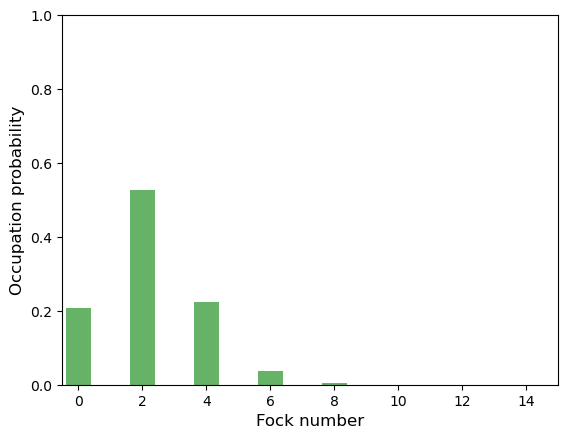

In [11]:
qt.plot_fock_distribution(rho);

# Plot Wigner function and Fock distribution

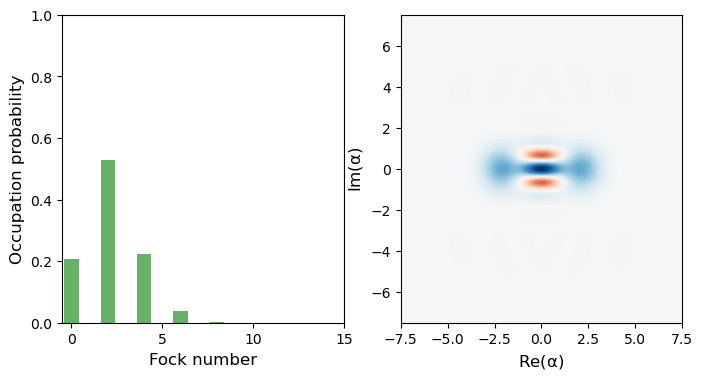

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
qt.plot_fock_distribution(rho, fig=fig, ax=axes[0])
qt.plot_wigner(rho, fig=fig, ax=axes[1]);

# Plot winger function

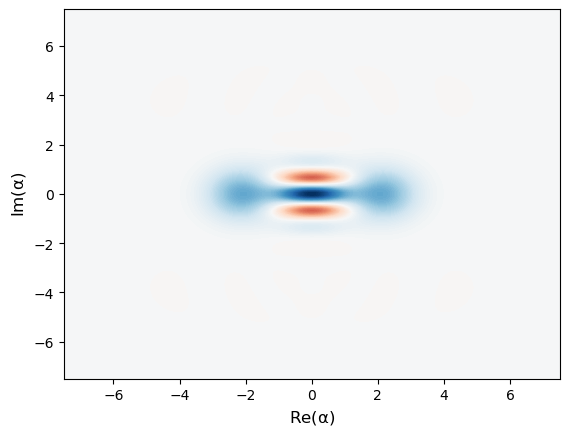

In [13]:
qt.plot_wigner(rho);

# Plot expectation values

In [14]:
H = sigmaz() + 0.3 * sigmay()
e_ops = [sigmax(), sigmay(), sigmaz()]
times = np.linspace(0, 10, 100)
psi0 = (basis(2, 0) + basis(2, 1)).unit()
result = qt.mesolve(H, psi0, times, [], e_ops)

/home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


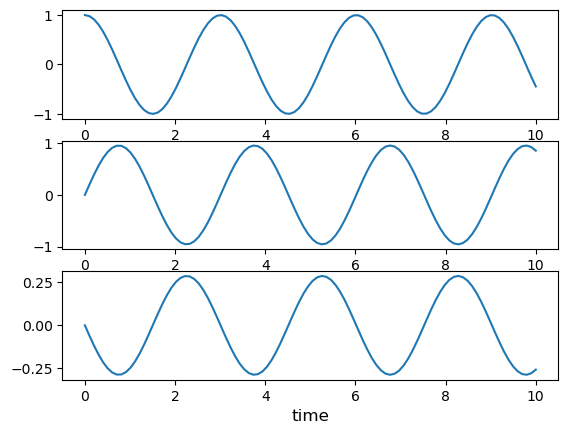

In [15]:
qt.plot_expectation_values(result);

# Bloch sphere

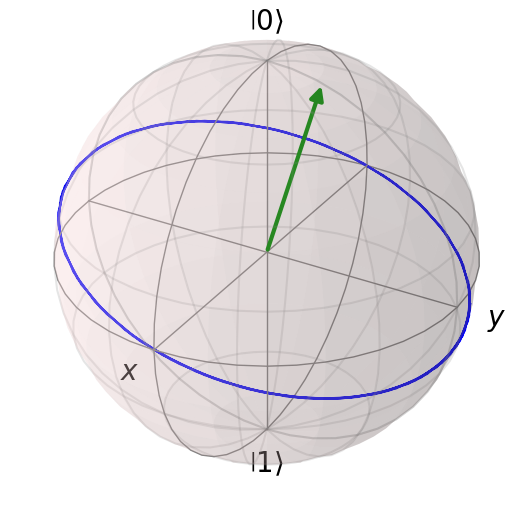

In [16]:
b = qt.Bloch()
b.add_vectors(qt.expect(H.unit(), e_ops))
b.add_points(result.expect, meth="l")
b.make_sphere()

# Plot spin Q-functions

In [17]:
j = 5
psi = qt.spin_state(j, -j)
psi = qt.spin_coherent(j, np.random.rand() * np.pi,
                       np.random.rand() * 2 * np.pi)
rho = qt.ket2dm(psi)

In [18]:
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)

In [19]:
Q, THETA, PHI = qt.spin_q_function(psi, theta, phi)

## 2D

/home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip/visualization.py:1588: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  artist_list.append([ax.pcolor(X, Y, P.real, cmap=cmap)])


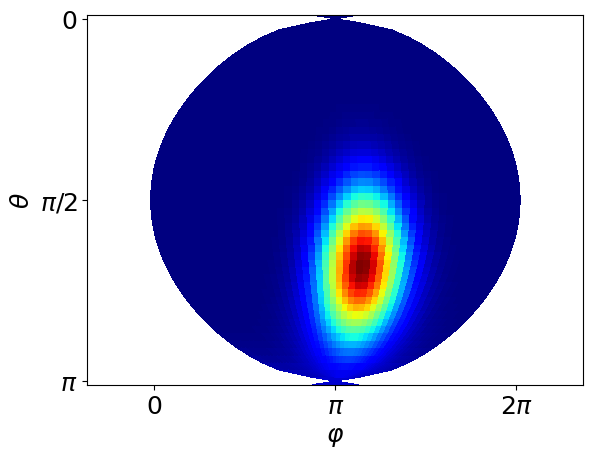

In [20]:
qt.plot_spin_distribution(Q, THETA, PHI);

## 3D

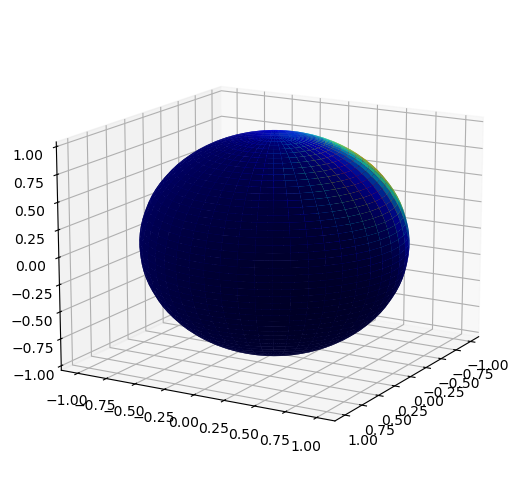

In [21]:
fig, ax = qt.plot_spin_distribution(Q, THETA, PHI, projection='3d')

ax.view_init(15, 30);

## Combined 2D and 3D

/home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip/visualization.py:1588: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  artist_list.append([ax.pcolor(X, Y, P.real, cmap=cmap)])


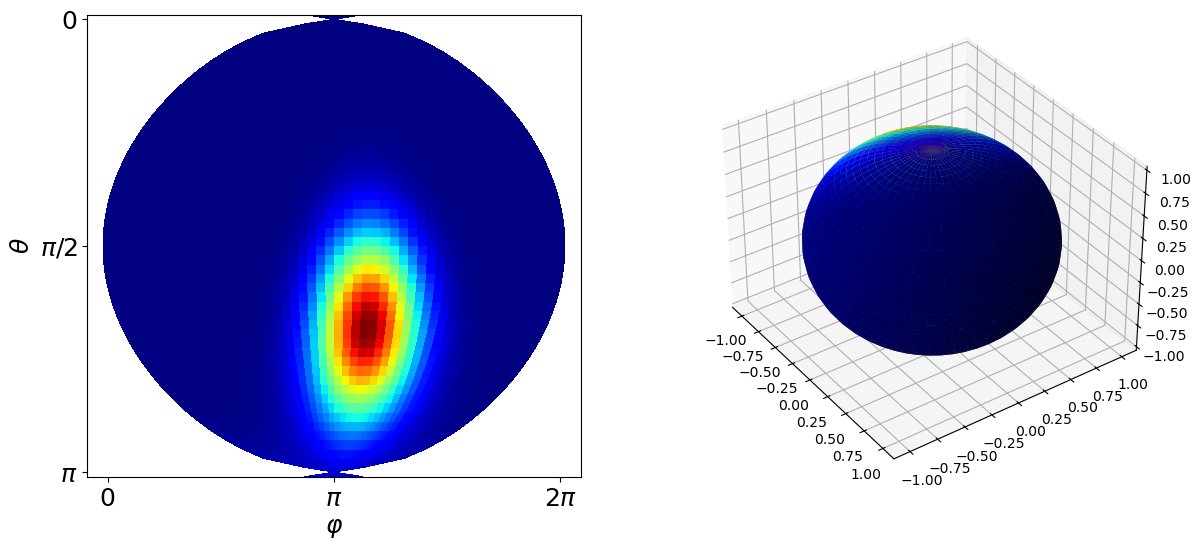

In [22]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
f1, a1 = qt.plot_spin_distribution(Q, THETA, PHI, fig=fig, ax=ax)

ax = fig.add_subplot(1, 2, 2, projection="3d")
f2, a2 = qt.plot_spin_distribution(Q, THETA, PHI, projection='3d', ax=ax);

# Plot spin-Wigner functions

In [23]:
W, THETA, PHI = qt.spin_wigner(psi, theta, phi)

/home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip/visualization.py:1588: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  artist_list.append([ax.pcolor(X, Y, P.real, cmap=cmap)])


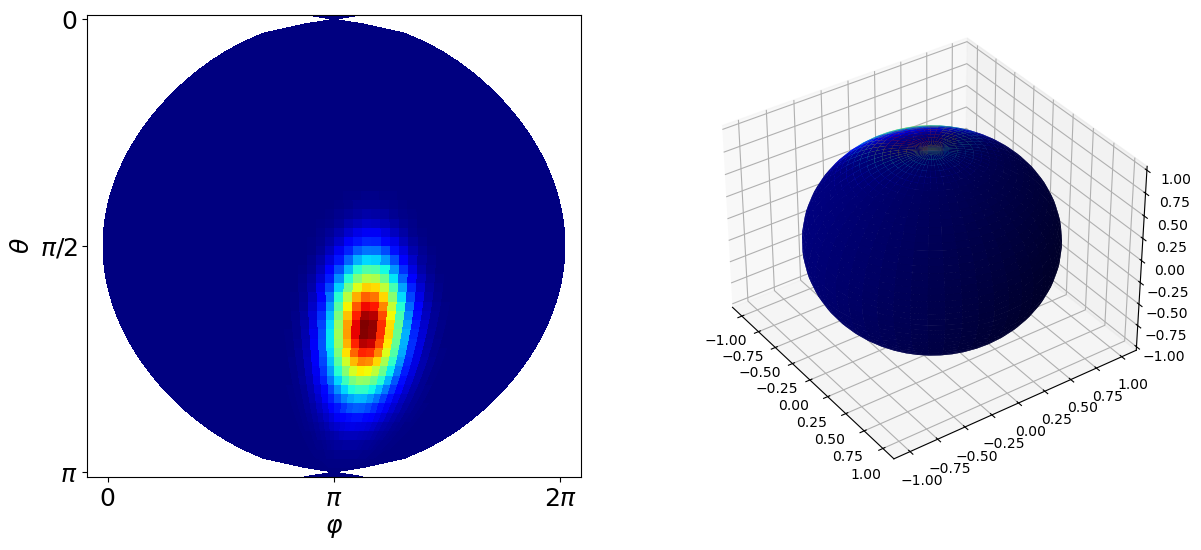

In [24]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
f1, a1 = qt.plot_spin_distribution(W.real, THETA, PHI, fig=fig, ax=ax)

ax = fig.add_subplot(1, 2, 2, projection="3d")
f2, a2 = qt.plot_spin_distribution(W.real, THETA, PHI, projection='3d', ax=ax);

# Versions

In [25]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Simon Cross, Asier Galicia, Paul Menczel, and Patrick Hopf.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.2.0.dev0+4033695
Numpy Version:      2.2.4
Scipy Version:      1.15.2
Cython Version:     3.0.12
Matplotlib Version: 3.10.1
Python Version:     3.12.0
Number of CPUs:     4
BLAS Info:          Generic
INTEL MKL Ext:      None
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip

Installed QuTiP family packages
-------------------------------



qutip-jax: 0.1.1.dev5
qutip-qtrl: 0.2.0.dev0+acb71a0
qutip-qip: 0.5.0.dev0+d58a82d

Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`
